# Endemo 2 - Useful Energy Demand Model Rework

## Industry Sector



### Import Packages

In [1]:
import pathlib

import xlrd as x
import pandas as pd
from pathlib import Path
import os

### Create Input Manager

In [2]:
from input import Input

input_manager = Input()

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\control_parameters.py:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  return [sector for (sector, isActive) in self._sectors_active_values.items() if isActive is 1]


0                    Belgium
1                   Bulgaria
2                    Czechia
3                    Denmark
4                    Germany
5                    Ireland
6                     Greece
7                      Spain
8                     France
9                    Croatia
10                     Italy
11                    Latvia
12                Luxembourg
13                   Hungary
14               Netherlands
15                   Austria
16                    Poland
17                  Portugal
18                   Romania
19                  Slovenia
20                  Slovakia
21                   Finland
22                    Sweden
23            United Kingdom
24                    Norway
25               Switzerland
26                Montenegro
27           North Macedonia
28                   Albania
29                    Serbia
30    Bosnia and Herzegovina
31                   Iceland
32                 Lithuania
33                   Estonia
Name: Country,

### Read production data

In [9]:

from collections import namedtuple


gs_param_ind_subs = pd.read_excel(input_path / "Set_and_Control_Parameters.xlsx", sheet_name="IND_subsectors")

product_names = gs_param_ind_subs.get("Main subsectors")

multiply_with_scalar = lambda e, s : e.combine(e.loc[e.index >= 0, e.columns != 'Country'].apply(lambda y : y * s), lambda s1, s2 : s2, overwrite=False)

chem_prod_ren_perc = gs_param_ind_subs.loc[gs_param_ind_subs["Parameter"] == "Percentage of chemical production with renewable H2", "Value"].iloc[0] / 100
dir_steel_perc = gs_param_ind_subs.loc[gs_param_ind_subs["Parameter"] == "Percentage of direct steel in steel production", "Value"].iloc[0] / 100

Retrieve = namedtuple("Retrieve", ["file_name", "sheet_name", "sheet_transform"])
data_access_spec = {"steel": Retrieve("Steel_Production.xlsx", "Data_total", lambda x: x),
                    "steel_prim": Retrieve("Steel_Production.xlsx", "Steel_prim", lambda x: x),
                    "steel_sec": Retrieve("Steel_Production.xlsx", "Steel_sec", lambda x: x),
                    "steel_direct": Retrieve("Steel_Production.xlsx", "Data_total", lambda x: multiply_with_scalar(x, dir_steel_perc)),
                    "alu_prim": Retrieve("Aluminium_Production.xlsx", "Prim_Data", lambda x: x),
                    "alu_sec": Retrieve("Aluminium_Production.xlsx", "Sec_Data_const", lambda x: x),
                    "copper_prim": Retrieve("Copper_Production.xlsx", "Copper_WSP", lambda x : x.loc[x["Type"] == "Primary"].drop("Type", axis=1)),
                    "copper_sec": Retrieve("Copper_Production.xlsx", "Copper_WSP", lambda x : x.loc[x["Type"] == "Secondary"].drop("Type", axis=1)),
                    "chlorine": Retrieve("Chlorin_Production.xlsx", "Data", lambda x: x),
                    "ammonia": Retrieve("Ammonia_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "methanol": Retrieve("Methanol_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "ethylene": Retrieve("Ethylene_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "propylene": Retrieve("Propylene_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "aromate": Retrieve("Aromate_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "ammonia_classic": Retrieve("Ammonia_Production.xlsx", "Data_const", lambda x: x),
                    "methanol_classic": Retrieve("Methanol_Production.xlsx", "Data_const", lambda x: x),
                    "ethylene_classic": Retrieve("Ethylene_Production.xlsx", "Data_const", lambda x: x),
                    "propylene_classic": Retrieve("Propylene_Production.xlsx", "Data_const", lambda x: x),
                    "aromate_classic": Retrieve("Aromate_Production.xlsx", "Data_const", lambda x: x),
                    "paper": Retrieve("Paper_Production.xlsx", "Data", lambda x: x),
                    "cement": Retrieve("Cement_Production.xlsx", "Data", lambda x: x),
                    "glass": Retrieve("Glass_Production.xlsx", "Data_const", lambda x: x.drop('Comment', axis=1)),
                    }

SECTOR["industry"].load_production_data(product_names, data_access_spec)


steel                   Country          1967          1968          1969  \
0                  Belgium   9712.000000  11568.000000  12832.000000   
1                  Denmark    401.000000    457.000000    482.000000   
2                   France  19658.000000  20403.000000  22510.000000   
3                  Germany  36744.000000  41159.000000  45316.000000   
4                  Ireland     54.000000     68.000000     81.000000   
5                    Italy  15890.000000  16964.000000  16428.000000   
6               Luxembourg   4461.000000   4834.000000   5521.000000   
7              Netherlands   3401.000000   3706.000000   4712.000000   
8           United Kingdom  24324.000000  26299.000000  26096.000000   
9                  Austria   3023.000000   3467.000000   3926.000000   
10                 Finland    411.000000    729.000000    978.000000   
11                  Greece    210.000000    210.000000    450.000000   
12                  Norway    790.000000    824.000000    8

TypeError: Product.__init__() takes 1 positional argument but 4 were given

In [ ]:
SECTOR["industry"].add_to_hierarchy("alu_prim", SECTOR["industry"].products["alu_prim"])
SECTOR["industry"].add_to_hierarchy("alu_sec", SECTOR["industry"].products["alu_sec"])
SECTOR["industry"].add_to_hierarchy("alu_sec", SECTOR["industry"].products["alu_sec"])
SECTOR["industry"].add_to_hierarchy("ammonia", SECTOR["industry"].products["ammonia"])
SECTOR["industry"].add_to_hierarchy("ammonia_classic", SECTOR["industry"].products["ammonia_classic"])

SECTOR["industry"].add_to_hierarchy("chlorine", SECTOR["industry"].products["chlorine"])

In [ ]:
prod = SECTOR["industry"].products["alu_prim"]

In [ ]:
dir(prod)

# New

## Test Utility functions
### Test Regression

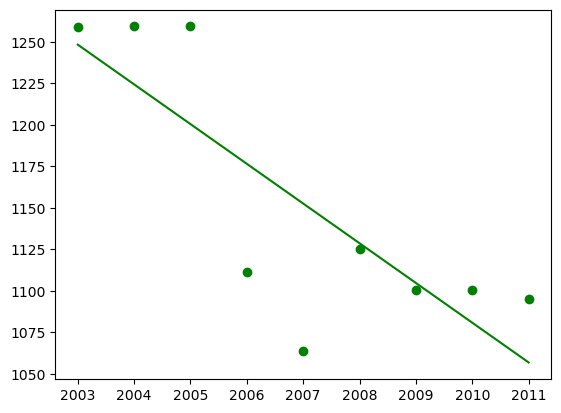

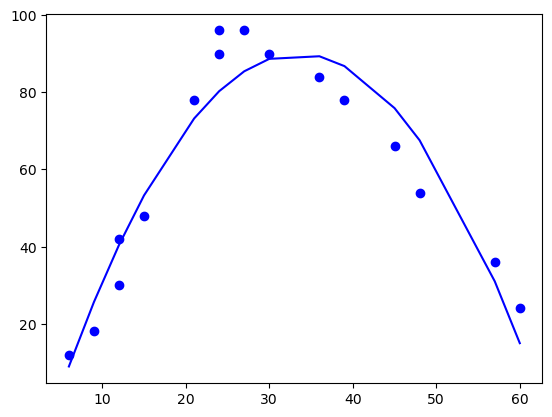

(-30.25286763906007, 7.173061390898329, -0.10698871880667692)

In [10]:
import utility as uty

# Test Linear Regression

x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
y = [1258.809906,1259.17278,1259.17278,1111.120188,1063.946568,1124.9094,1100.233968,1100.233968,1095.153732]
data = list(zip(x, y))

uty.linear_regression(data, visualize=True)

# Test Quadratic Regression

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.quadratic_regression(data, visualize=True)


### Test filter out NaN and Inf

In [11]:
import numpy as np
import math
import utility as uty

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, np.NaN, np.inf, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.filter_out_NaN_and_Inf(data)

[(6, 12),
 (12, 42),
 (15, 48),
 (21, 78),
 (24, 90),
 (24, 96),
 (27, 96),
 (30, 90),
 (36, 84),
 (39, 78),
 (45, 66),
 (48, 54),
 (57, 36),
 (60, 24)]

### Combining Data on the x axis

Attention! If the x axis is ascending for both data arrays, use ascending_x=True for better performance!

In [1]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(uty.combine_data_on_x(a, b, ascending_x=True))

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(3, 3000),(2, 2000),  (5, 5000)]

print(uty.combine_data_on_x(a, b))


[(200, 2000), (300, 3000), (500, 5000)]
[(200, 2000), (300, 3000), (500, 5000)]


### Zip on X explained

In [3]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(list(uty.zip_on_x(a, b)))

[((2, 200), (2, 2000)), ((3, 300), (3, 3000)), ((5, 500), (5, 5000))]


In [3]:
import utility as uty

amount = [(1998, 10), (2001, 12), (2003, 11), (2006, 13)]
population = [(2000, 10000), (2001, 11000), (2002, 12000), (2003, 13000), (2004, 14000), (2005, 14000), (2006, 15000)]
gdp = [(2000, 20), (2001, 30), (2002, 20), (2003, 30), (2004, 40), (2005, 50), (2006, 60)]

zip_amount_pop = list(uty.zip_on_x(amount, population))

print("zipped amount & population: " + str(zip_amount_pop))
print("Transformed amount to per capita: " + str(list(map(lambda arg: (arg[0][0], arg[0][1] / arg[1][1]), zip_amount_pop))))

zipped amount & population: [((2001, 12), (2001, 11000)), ((2003, 11), (2003, 13000)), ((2006, 13), (2006, 15000))]
Transformed amount to per capita: [(2001, 0.001090909090909091), (2003, 0.0008461538461538462), (2006, 0.0008666666666666666)]
